In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm

In [2]:
import numpy as np 

def load_file(file_name):
    with open(file_name, 'rb') as file:
        return np.load(file)        

In [3]:
folder_save = '../dataset'
scaled_matrix = load_file(f"{folder_save}/scale_matrix.npy")

In [4]:
selected_customers = pd.read_csv('../dataset/selected_customers.csv')

# Phân cụm khách hàng

### Tìm số lượng cụm

In [5]:
for n_clusters in range(3,15):
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
    kmeans.fit(scaled_matrix)
    clusters = kmeans.predict(scaled_matrix)
    silhouette_avg = silhouette_score(scaled_matrix, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 3 The average silhouette_score is : 0.15032639893590893
For n_clusters = 4 The average silhouette_score is : 0.1688109568438652
For n_clusters = 5 The average silhouette_score is : 0.17380803435480566
For n_clusters = 6 The average silhouette_score is : 0.1909898721047971
For n_clusters = 7 The average silhouette_score is : 0.202999054351983
For n_clusters = 8 The average silhouette_score is : 0.21467484193082897
For n_clusters = 9 The average silhouette_score is : 0.19857936406955642
For n_clusters = 10 The average silhouette_score is : 0.20819017077569288
For n_clusters = 11 The average silhouette_score is : 0.21147448959865767
For n_clusters = 12 The average silhouette_score is : 0.2113098231373514
For n_clusters = 13 The average silhouette_score is : 0.21300053763270585
For n_clusters = 14 The average silhouette_score is : 0.20571724064516608


### Chọn số lượng cụm là 8

In [8]:
n_clusters = 8
kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=100)
kmeans.fit(scaled_matrix)
clusters_clients = kmeans.predict(scaled_matrix)
silhouette_avg = silhouette_score(scaled_matrix, clusters_clients)
print('score for silhouette {:<.3f}'.format(silhouette_avg))

score for silhouette 0.214


In [9]:
pd.DataFrame(pd.Series(clusters_clients).value_counts(), columns = ['Number of values']).T

,3,1,6,0,7,5,2,4
Number of values,227,196,181,147,102,99,9,2


### Đánh giá chất lượng của phân tách thông qua các điểm Silouhette trong các cụm khác nhau

In [21]:
def graph_component_silhouette(n_clusters, lim_x, mat_size, sample_silhouette_values, clusters):
    plt.rcParams["patch.force_edgecolor"] = True
    plt.style.use('fivethirtyeight')
    mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
    #____________________________
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(8, 8)
    ax1.set_xlim([lim_x[0], lim_x[1]])
    ax1.set_ylim([0, mat_size + (n_clusters + 1) * 10])
    y_lower = 10
    for i in range(n_clusters):

        ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        cmap = cm.get_cmap("Spectral")
        color = cmap(float(i) / n_clusters)        
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                           facecolor=color, edgecolor=color, alpha=0.8)

        ax1.text(-0.03, y_lower + 0.5 * size_cluster_i, str(i), color = 'red', fontweight = 'bold',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round, pad=0.3'))

        y_lower = y_upper + 10  

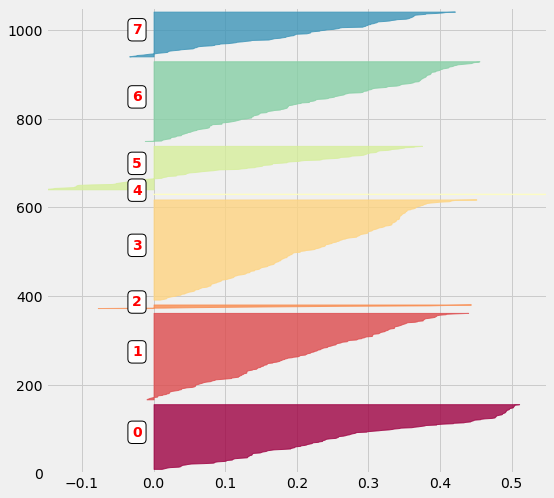

In [22]:
sample_silhouette_values = silhouette_samples(scaled_matrix, clusters_clients)

sample_silhouette_values = silhouette_samples(scaled_matrix, clusters_clients)

graph_component_silhouette(n_clusters, [-0.15, 0.55], len(scaled_matrix), sample_silhouette_values, clusters_clients)

# Hình thái khách hàng

In [23]:
selected_customers.loc[:, 'cluster'] = clusters_clients
selected_customers

,CustomerID,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4,LastPurchase,FirstPurchase,cluster
0,12347.0,1,711.79,711.79,711.790,711.79,17.482684,26.299892,3.287486,11.716939,41.212998,33,33,5
1,12348.0,1,652.80,652.80,652.800,652.80,0.000000,26.654412,73.345588,0.000000,0.000000,24,24,7
2,12370.0,2,157.20,1587.07,872.135,1744.27,7.157722,35.958883,9.958321,32.999478,13.925596,23,26,5
3,12377.0,1,1001.52,1001.52,1001.520,1001.52,0.000000,32.710280,9.837048,21.926671,35.526000,20,20,5
4,12383.0,1,543.72,543.72,543.720,543.72,0.000000,39.174575,48.852350,3.255352,8.717722,18,18,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958,18245.0,1,365.73,365.73,365.730,365.73,0.000000,33.549340,34.118065,13.124436,19.208159,21,21,7
959,18259.0,1,376.30,376.30,376.300,376.30,0.000000,13.393569,0.000000,21.445655,65.160776,32,32,6
960,18260.0,2,230.70,538.82,384.760,769.52,20.818172,30.798420,16.571369,26.003223,5.808816,0,24,3
961,18269.0,1,138.90,138.90,138.900,138.90,0.000000,28.509719,14.686825,0.000000,56.803456,32,32,6


In [24]:
merged_df = pd.DataFrame()
for i in range(n_clusters):
    test = pd.DataFrame(selected_customers[selected_customers['cluster'] == i].mean())
    test = test.T.set_index('cluster', drop = True)
    test['size'] = selected_customers[selected_customers['cluster'] == i].shape[0]
    merged_df = pd.concat([merged_df, test])
#_____________________________________________________
merged_df.drop('CustomerID', axis = 1, inplace = True)
print('number of customers:', merged_df['size'].sum())

merged_df = merged_df.sort_values('sum')

number of customers: 963


In [25]:
liste_index = []
for i in range(5):
    column = 'categ_{}'.format(i)
    liste_index.append(merged_df[merged_df[column] == merged_df[column].max()].index.values[0])

liste_index_reordered = liste_index
liste_index_reordered += [ s for s in merged_df.index if s not in liste_index]

In [26]:
merged_df = merged_df.reindex(index = liste_index_reordered)
merged_df = merged_df.reset_index(drop = False)
merged_df[['cluster', 'count', 'min', 'max', 'mean', 'sum', 'categ_0','categ_1', 'categ_2', 'categ_3', 'categ_4', 'size']]

,cluster,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4,size
0,1.0,1.586735,225.676429,294.981735,260.863474,421.093571,47.693808,14.893571,7.003086,15.876610,14.615084,196
1,3.0,1.418502,232.783392,284.323084,258.602015,364.743744,11.510011,45.582200,10.507730,19.442480,12.980106,227
2,7.0,1.372549,226.599902,262.721275,243.429985,328.897255,12.165377,22.322345,39.722502,16.474159,9.384533,102
3,0.0,1.401361,214.963810,284.941361,249.036321,360.364218,19.473898,13.508290,4.869622,53.071215,9.076975,147
4,6.0,1.596685,205.974254,296.699945,246.682020,415.069116,14.028226,13.696800,6.326045,17.433417,48.584993,181
5,5.0,2.292929,656.437475,1159.658081,861.591558,1892.975152,23.543029,23.758026,9.233919,22.184821,21.280205,99
6,2.0,1.666667,2157.394444,3083.691111,2606.804444,4169.980000,15.064805,29.984100,15.149571,21.108476,18.693047,9
7,4.0,35.500000,11.575000,505.625000,127.929829,4525.385000,24.389746,20.869772,8.158005,21.455491,25.126986,2


### Phân tích tính chất của từng cụm thông qua biểu đồ Rada

In [27]:
def _scale_data(data, ranges):
    (x1, x2) = ranges[0]
    d = data[0]
    return [(d - y1) / (y2 - y1) * (x2 - x1) + x1 for d, (y1, y2) in zip(data, ranges)]

class RadarChart():
    def __init__(self, fig, location, sizes, variables, ranges, n_ordinate_levels = 4):

        angles = np.arange(0, 360, 360./len(variables))

        ix, iy = location[:] ; size_x, size_y = sizes[:]
        
        axes = [fig.add_axes([ix, iy, size_x, size_y], polar = True, 
        label = "axes{}".format(i)) for i in range(len(variables))]

        _, text = axes[0].set_thetagrids(angles, labels = variables)
        
        for txt, angle in zip(text, angles):
            if angle > -1 and angle < 181:
                txt.set_rotation(angle - 90)
            else:
                txt.set_rotation(angle - 270)
        
        for ax in axes[1:]:
            ax.patch.set_visible(False)
            ax.xaxis.set_visible(False)
            ax.grid("off")
        
        for i, ax in enumerate(axes):
            grid = np.linspace(*ranges[i],num = n_ordinate_levels)
            grid_label = [""]+["{:.0f}".format(x) for x in grid[1:]]
            ax.set_rgrids(grid, labels = grid_label, angle = angles[i])
            ax.set_ylim(*ranges[i])
        
        self.angle = np.deg2rad(np.r_[angles, angles[0]])
        self.ranges = ranges
        self.ax = axes[0]
                
    def plot(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.plot(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

    def fill(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.fill(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

    def legend(self, *args, **kw):
        self.ax.legend(*args, **kw)
        
    def title(self, title, *args, **kw):
        self.ax.text(0.9, 1, title, transform = self.ax.transAxes, *args, **kw)

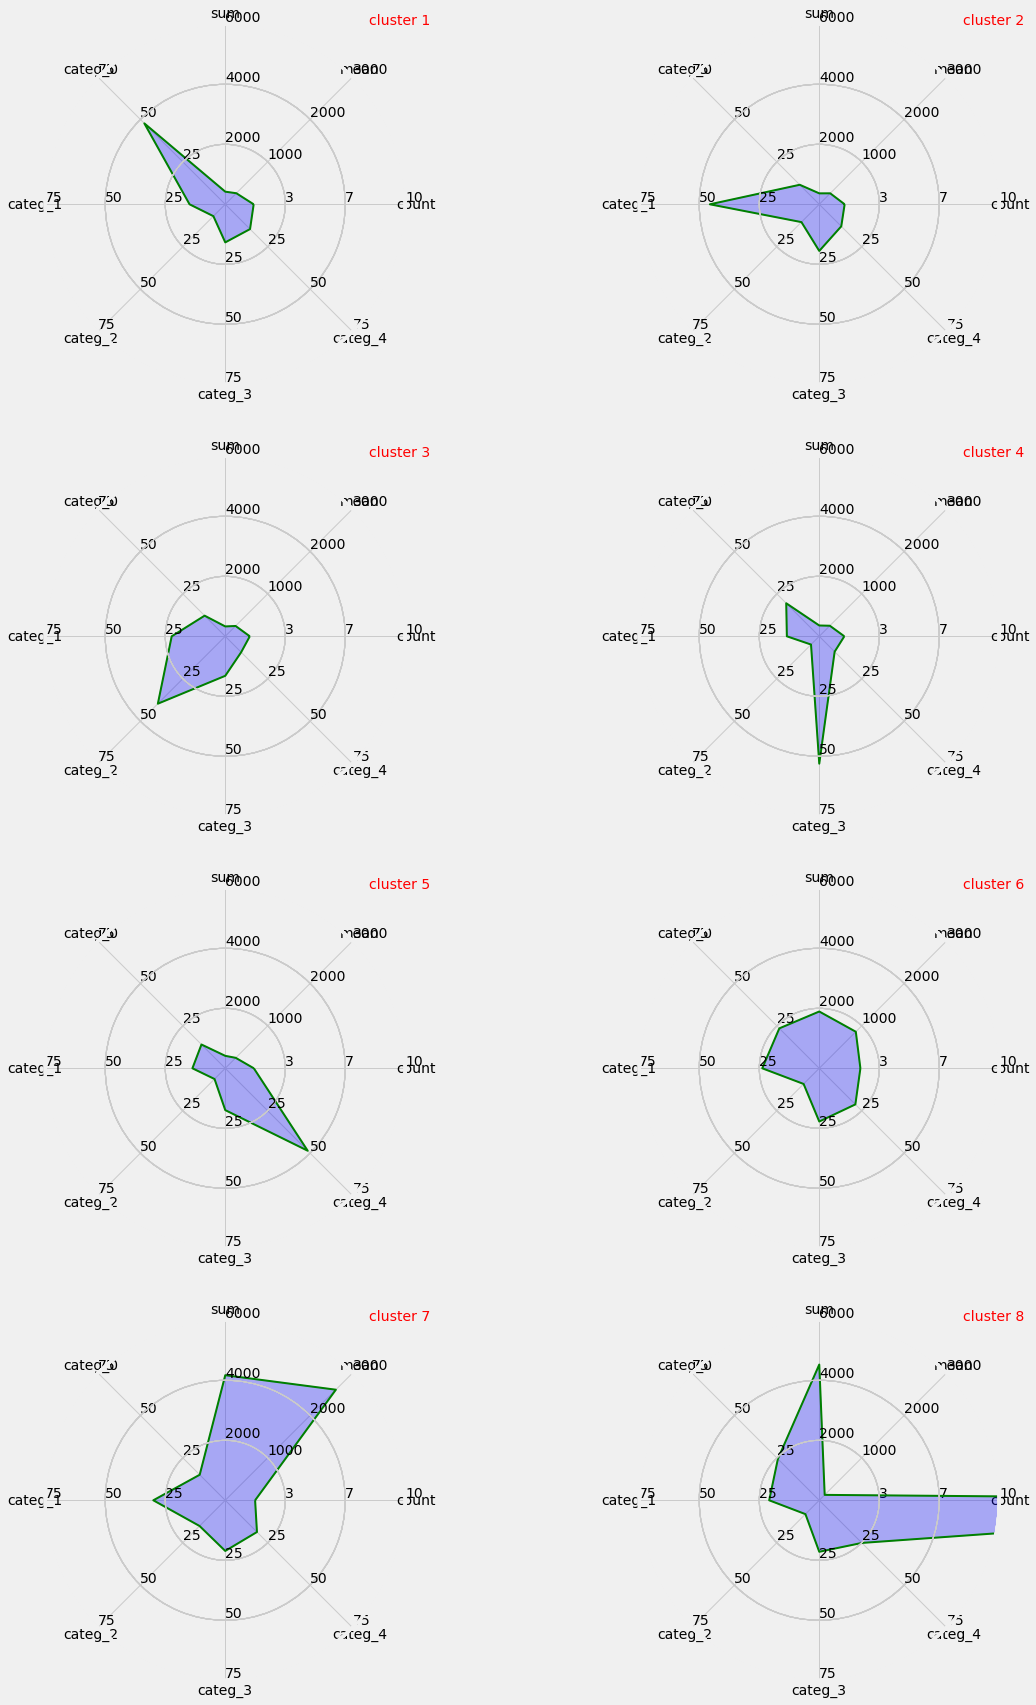

In [29]:
fig = plt.figure(figsize=(15,20))

attributes = ['count', 'mean', 'sum', 'categ_0', 'categ_1', 'categ_2', 'categ_3', 'categ_4']
ranges = [[0.01, 10], [0.01, 3000], [0.01, 6000], [0.01, 75], [0.01, 75], [0.01, 75], [0.01, 75], [0.01, 75]]
index  = [0, 1, 2, 3, 4, 5, 6, 7]

n_groups = n_clusters ; i_cols = 2
i_rows = n_groups//i_cols
size_x, size_y = (1/i_cols), (1/i_rows)

for ind in range(n_clusters):
    ix = ind%2 ; iy = i_rows - ind//2
    pos_x = ix*(size_x + 0.05) ; pos_y = iy*(size_y + 0.05)            
    location = [pos_x, pos_y]  ; sizes = [size_x, size_y] 
    data = np.array(merged_df.loc[index[ind], attributes])
    radar = RadarChart(fig, location, sizes, attributes, ranges)
    radar.plot(data, color = 'g', linewidth=2.0)
    radar.fill(data, alpha = 0.3, color = 'b')
    radar.title(title = 'cluster {}'.format(index[ind]+1), color = 'r')
    ind += 1 

### 5 cụm đầu tiên có mức độ ưu tiên cao hơn với một danh mục cụ thể
### Cụm thứ 6 có sự phân bổ đồng đều giữa các danh mục sản phảm
### Cụm thứ 7 ưu thích mua các sản phẩm có giá trị cao
### Cụm thứ 8 ưu tiên mua nhiều sản phẩm do đó tổng giá trị đơn hàng sẽ cao lên